# Career Foundry Exercise 6.5 - UnSupervised Machine Learning
#### Gabriel Pollicar, January 2, 2024

### _________________________________________________________________

## Contents List:


### - 2. Importing Libraries and Datasets
### - 3. Using Elbow Technique
### - 4. Make informed decision on number of clusters
### - 5. Running the k-means algorithm
### - 6. Attaching new columns of resulting clusters
### - 7. Creating Visualizations
### - 8. Discussion 
### - 9. Calculate descriptive statistics
### - 10. Discussion and propose future steps

### 

### - Exporting Datasets

### _________________________________________________________________


## 2. Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy
import folium 
import json
import geopandas as gpd

# Modules from Scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

 # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

## Importing Datasets

In [3]:
# Importing the realtor data 

path = r'C:\Users\polli\Career Foundry Python'
realtor_data = pd.read_csv(os.path.join(path, 'Exercise 6.4','02 Data', 'realtor-data_Cleaned.csv'))

In [4]:
realtor_data.shape

(49262, 21)

In [5]:
# fix extra column
realtor_data = realtor_data.drop('Unnamed: 0', axis=1)
realtor_data.head(1)

status  bed  bath  acre_lot    city_x        state  zip_code  house_size  \
0  for_sale  3.0   2.0      0.12  Adjuntas  Puerto Rico       601       920.0   

  prev_sold_date     price       lat       lng    city_y   state_name  \
0            NaN  105000.0  18.18027 -66.75266  Adjuntas  Puerto Rico   

   population  density  county_fips county_name  \
0     17126.0    102.6        72001    Adjuntas   

                    county_weights county_fips_all  
0  {"72001": 98.73, "72141": 1.27}     72001|72141

### Cleaning and Manipulating Dataset

In [6]:
# remove any categorical columns from your data
realtor_sub = realtor_data[['bed', 'bath', 'acre_lot', 'house_size', 'price', 'density']]

In [7]:
realtor_sub['density'].value_counts(dropna = False)

density
6676.6    252
3631.1    221
4652.6    211
9178.7    206
5365.8    201
         ... 
79.0        1
71.8        1
1032.0      1
195.6       1
17.5        1
Name: count, Length: 2560, dtype: int64

In [8]:
# Checks for missing values 
bool_series = pd.isnull(realtor_sub["density"])  
    
# filtering data  
# displaying data where missing values exist
realtor_sub[bool_series].shape

# This showed that the missing values were missing population and pop density values for 26 entries
# Because they're a small amount, I can drop these rows

(26, 6)

In [9]:
# Removes missing values from dataset

realtor_sub = realtor_sub.dropna()

In [10]:
# Checks for missing values 
bool_series = pd.isnull(realtor_sub["density"])  
    
# filtering data  
# displaying data only with Gender = Not NaN  
realtor_sub[bool_series].shape

# Result shows no missing values

(0, 6)

#
## 3. Elbow Technique
#

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(realtor_sub).score(realtor_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\polli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polli\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\polli\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\polli\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^

[-2565155428441723.0,
 -739302174768834.9,
 -357031485305098.8,
 -207667374125449.12,
 -133151975583037.03,
 -94256809613059.73,
 -70423968827736.86,
 -53636443848333.98,
 -42761506974570.13]

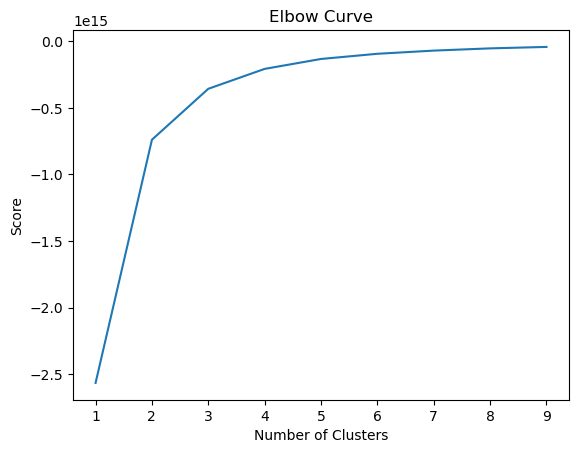

In [13]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  This elbow curve shows a large steep increase from 1 to 3 but the curve begins to straighten out. This means that for my data there are three optimum clusters. 

#
## 4. Making an Informed Decision on Clusters
#

In [14]:
# Create the k-means object with 3 clusters

kmeans = KMeans(n_clusters = 3) 

#
## 5. Run K-Means Algorithm
#

In [15]:
# Fit the k-means object to the data.

kmeans.fit(realtor_sub)

C:\Users\polli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

#
## 6. Attaching New Column with Clusters
#

In [16]:
realtor_sub['clusters'] = kmeans.fit_predict(realtor_sub)

C:\Users\polli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
realtor_sub.head()

# Result shows that new cluster column was successfully made. 

bed  bath  acre_lot  house_size     price  density  clusters
0  3.0   2.0      0.12       920.0  105000.0    102.6         1
1  4.0   2.0      0.08      1527.0   80000.0    102.6         1
2  2.0   1.0      0.15       748.0   67000.0    284.7         1
3  3.0   2.0      0.08      1045.0  150000.0    284.7         1
4  3.0   1.0      0.15       800.0   99000.0    284.7         1

In [18]:
# Check how many items in each cluster
realtor_sub['clusters'].value_counts()

clusters
1    23791
0    16790
2     8655
Name: count, dtype: int64

#
## 7. Visualizations
#

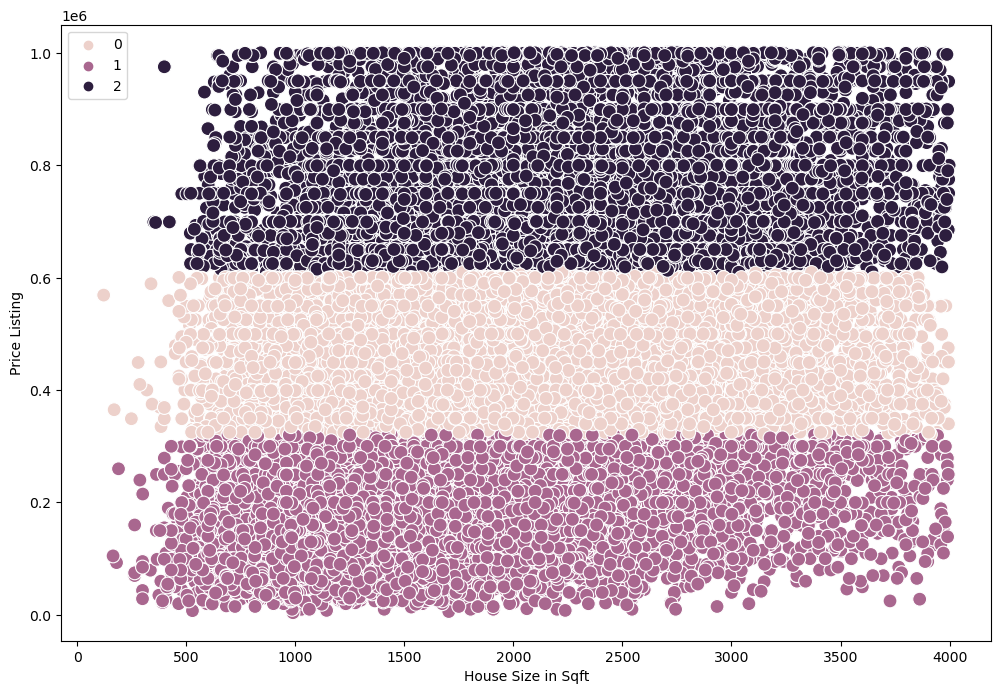

In [19]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=realtor_sub['house_size'], y=realtor_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('House Size in Sqft') # Label x-axis.
plt.ylabel('Price Listing') # Label y-axis.
plt.show()

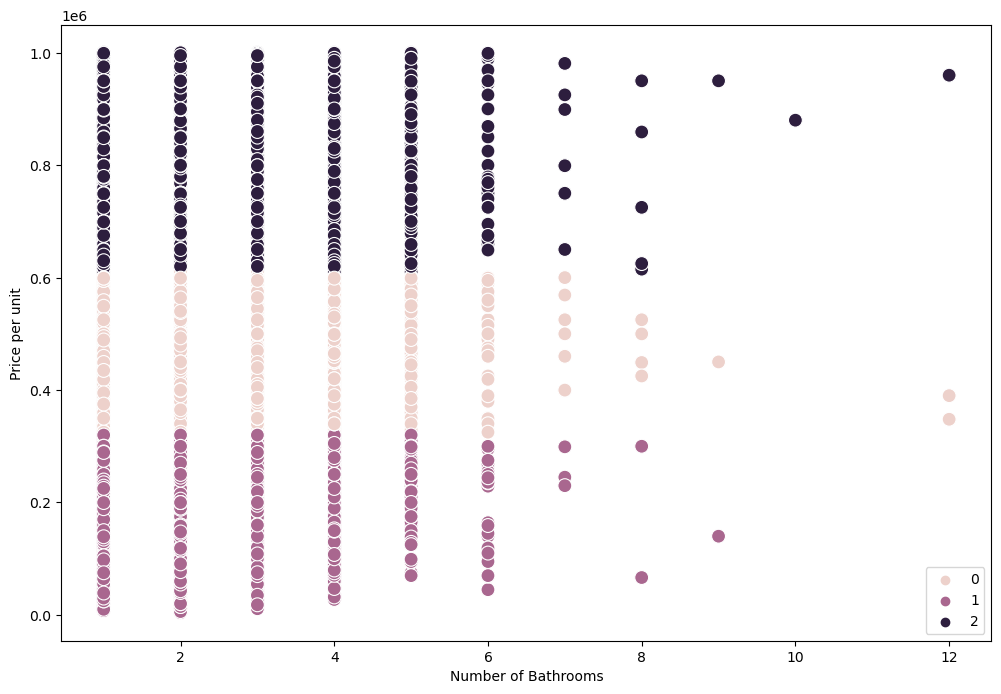

In [20]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=realtor_sub['bath'], y=realtor_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Bathrooms') # Label x-axis.
plt.ylabel('Price per unit') # Label y-axis.
plt.show()

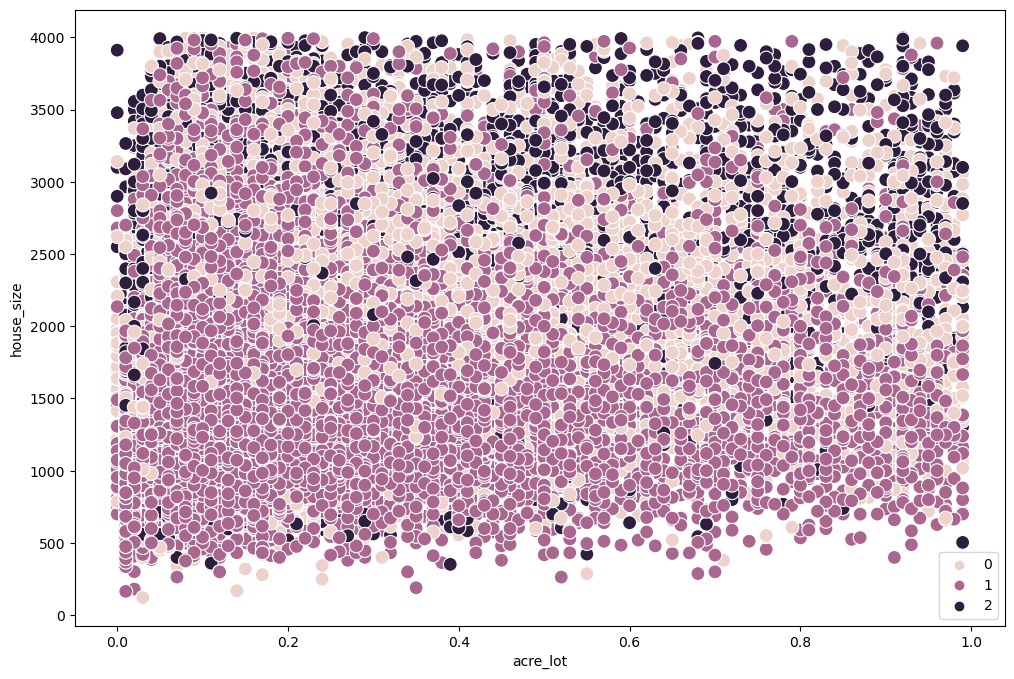

In [21]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=realtor_sub['acre_lot'], y=realtor_sub['house_size'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('acre_lot') # Label x-axis.
plt.ylabel('house_size') # Label y-axis.
plt.show()

#
## 8. Discussing Resulting Clusters
#

#### Observation:
It seems that the clusters have grouped houses around ranges of their listing prices. By using the K-means algorithm, it was able to identify 3 price ranges that most houses associate with. It seems that the three clusters are for houses in the low price range, middle price, and high price ranges. I would assume that the price ranges chosen are from the most associated price ranges for each specific cluster of property listings. For instance, a scatterplot of housing size vs price shows a cluster of highly priced houses above 600k. This means that the algorithm found houses in high prices 
####  
Additionally, I created a visualization above of a scatterplot of house size vs acre plots which shows a very small correlation with the clusters set around pricing. This is expected from previous analysis where I saw almost no correlation with price to acreages and house size for the entire dataset. It seems that cluster 2 which clustered around lower priced houses have smaller total square feet in size than cluster 1 which is higher priced range houses. This is expected since smaller houses with lower acreages will tend to cost less. Medium priced houses are displayed in all ranges when mapping acre lot vs house size however.  
#### 
Next step would be to analyze clusters for specific states similar to what I did in my last exercise. I could also standardize all values since in the previous output, the weight was heavily biased towards the housing price. 

#
## 9. Descriptive Statistics of Clusters
#

In [22]:
realtor_sub.loc[realtor_sub['clusters'] == 2, 'cluster'] = 'dark purple'
realtor_sub.loc[realtor_sub['clusters'] == 1, 'cluster'] = 'purple'
realtor_sub.loc[realtor_sub['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
realtor_sub.head(1)

bed  bath  acre_lot  house_size     price  density  clusters cluster
0  3.0   2.0      0.12       920.0  105000.0    102.6         1  purple

In [24]:
realtor_sub.groupby('cluster').agg({'bed':['mean', 'median'], 
                         'bath':['mean', 'median'], 
                         'acre_lot':['mean', 'median'],
                          'house_size':['mean', 'median'],
                            'price':['mean', 'median'],
                            'density':['mean', 'median'],})

bed             bath         acre_lot          house_size  \
                 mean median      mean median      mean median         mean   
cluster                                                                       
dark purple  3.817447    4.0  2.806008    3.0  0.255984   0.17  2189.646101   
pink         3.464145    3.0  2.409887    2.0  0.271483   0.21  1875.601489   
purple       3.259552    3.0  1.813837    2.0  0.212816   0.15  1501.953890   

                             price                density           
             median           mean    median         mean   median  
cluster                                                             
dark purple  2164.0  773256.874754  749998.0  3876.751935  1500.60  
pink         1792.0  444978.152293  430000.0  1819.093026   798.25  
purple       1368.0  196733.570762  199900.0  1567.792232   614.70

#
## 10. Use for these Results in Future Analysis
#

### Observation:

It seems that the K-means algorithm favored the price of houses mostly than all other values, this can be because of bias towards the highest scaling variable. However, it did show some insight when visualizing the clusters between housing size vs lot acreage. This scatterplot showed that lower priced homes clustered mainly around lower house size than they did with lot acreage. This is supported from correlation values from earlier exercise. House size seems to have a much higher correlation to price than acreage. 

### Next Steps:
### 
The next step seems to be fitting a subset of the data with only regarding one state similar to my previous exercise where I subset the data to properties only in New Jersey as an example. This dataset helps remove other variables that differences in states might have on the results such as differences in price due to taxes, environment etc. Also, I will standardize all variables so that no variable such as price or zip code population density has a bias effect on the clustering. 

In [25]:
# Subsetting data to analyze only houses in New Jersey, I chose this state at random, as an example

realtorNJ = realtor_data[realtor_data['state'] == "New Jersey"]
realtorNJ_sub = realtorNJ[['bed', 'bath', 'acre_lot', 'house_size', 'price', 'density']]

In [26]:
# Checks for missing values 
bool_series = pd.isnull(realtorNJ_sub["density"])  
    
# filtering data  
# displaying data where missing values exist
realtorNJ_sub[bool_series].shape

# result shows no missing values

(0, 6)

In [27]:
# standardize your data
# I found price and density were too high in scale, 100s of thousands compared to the 1-5 scale of
## number of bedrooms and bathrooms. I also then found that beds/baths are higher in scale than acreage
## which is below .2, therefore I standardized all variables to make sure no variable had too much weighted bias. 


realtorNJ_sub['price'] = scipy.stats.zscore(realtorNJ_sub['price'] )
realtorNJ_sub['house_size'] = scipy.stats.zscore(realtorNJ_sub['house_size'] )
realtorNJ_sub['density'] = scipy.stats.zscore(realtorNJ_sub['density'] )
realtorNJ_sub['acre_lot'] = scipy.stats.zscore(realtorNJ_sub['acre_lot'] )
realtorNJ_sub['bath'] = scipy.stats.zscore(realtorNJ_sub['bath'] )
realtorNJ_sub['bed'] = scipy.stats.zscore(realtorNJ_sub['bed'] )

C:\Users\polli\AppData\Local\Temp\ipykernel_37100\225084945.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realtorNJ_sub['price'] = scipy.stats.zscore(realtorNJ_sub['price'] )
C:\Users\polli\AppData\Local\Temp\ipykernel_37100\225084945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realtorNJ_sub['house_size'] = scipy.stats.zscore(realtorNJ_sub['house_size'] )
C:\Users\polli\AppData\Local\Temp\ipykernel_37100\225084945.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [28]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

score = [kmeans[i].fit(realtorNJ_sub).score(realtorNJ_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\polli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-57420.00000000003,
 -38981.08237974026,
 -33111.39840007774,
 -28972.861482976645,
 -25629.96580665392,
 -23963.192955027786,
 -22414.6197604356,
 -21026.655882310755,
 -19810.0387631797]

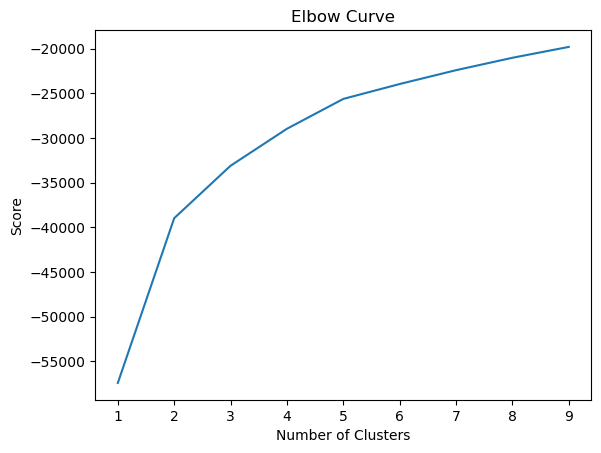

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [30]:
# The previous elbow curve shows a less steep curve than the previous analysis. Here I think that
## at 4 clusters the increase in score seems to drop off. I've generated the graph with 3, 4, and 5 clusters 
## and it seems that the maximum clear clusters that can be generated is 3 if I set it to 4 clusters. 

kmeans = KMeans(n_clusters = 4) 
kmeans.fit(realtorNJ_sub)

C:\Users\polli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [31]:
# Creating Cluster column

realtorNJ_sub['clusters'] = kmeans.fit_predict(realtorNJ_sub)
realtorNJ_sub['clusters'].value_counts()

C:\Users\polli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polli\AppData\Local\Temp\ipykernel_37100\4075813213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realtorNJ_sub['clusters'] = kmeans.fit_predict(realtorNJ_sub)


clusters
1    3787
3    3496
0    1904
2     383
Name: count, dtype: int64

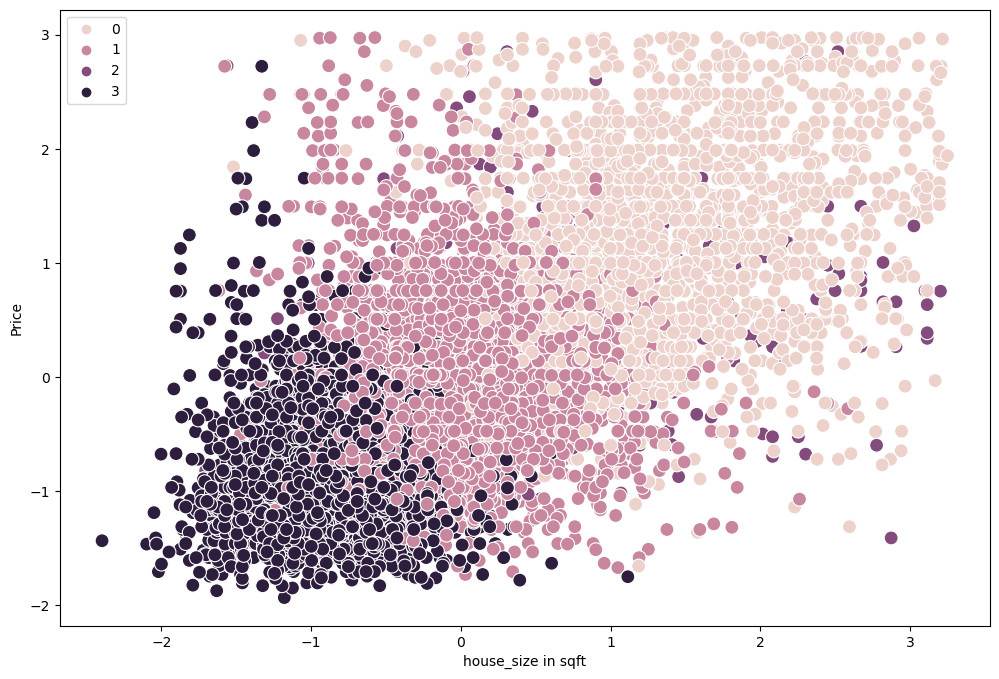

In [32]:
# Plot the clusters for the house size and listing price variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=realtorNJ_sub['house_size'], y=realtorNJ_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('house_size in sqft') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Observation:
It seems that standardizing price, allowed for other variables to be represented in the cluster more clearly. There are three clear clusters showing, cluster 0-2. Cluster 3 which is black seems to be the least coherent cluster. Maybe this is shown in another dimension of variables such as acreage or number of beds/baths. 

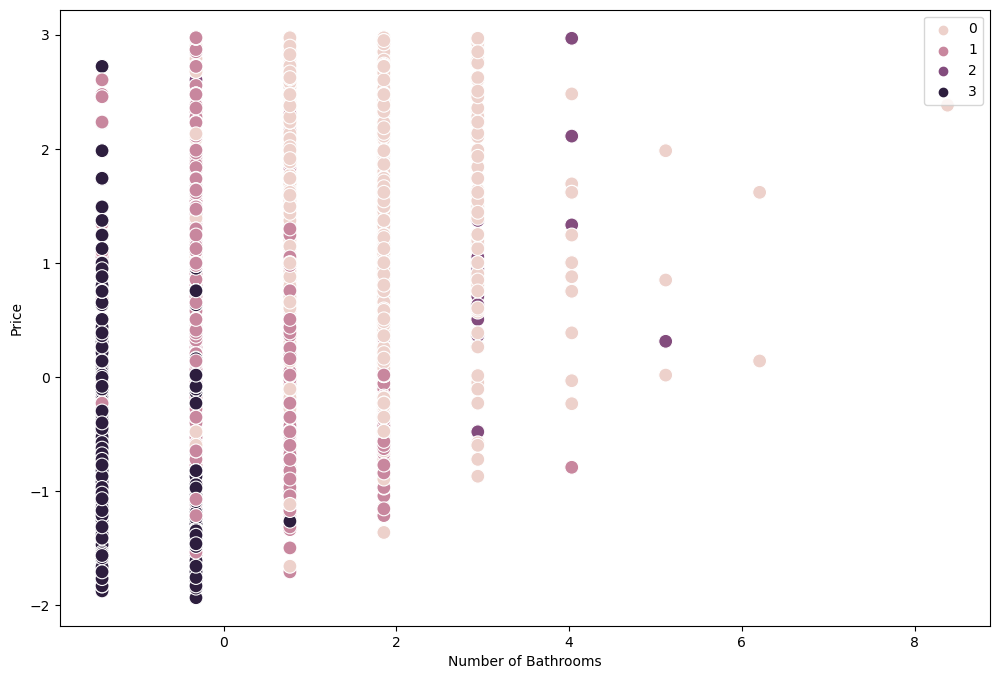

In [33]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=realtorNJ_sub['bath'], y=realtorNJ_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Bathrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

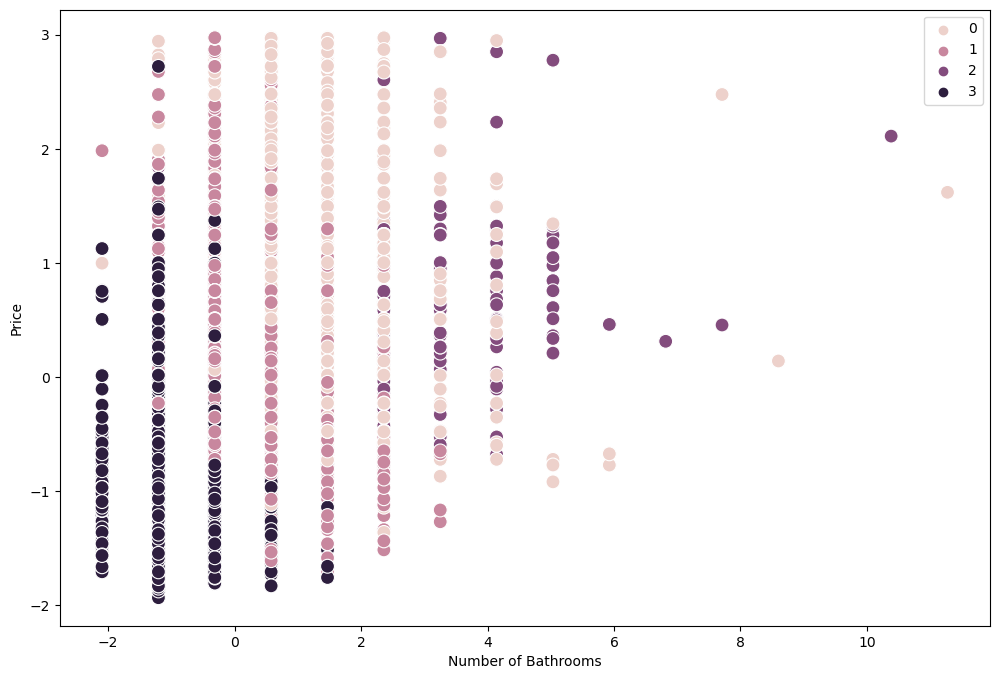

In [37]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=realtorNJ_sub['bed'], y=realtorNJ_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Bathrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

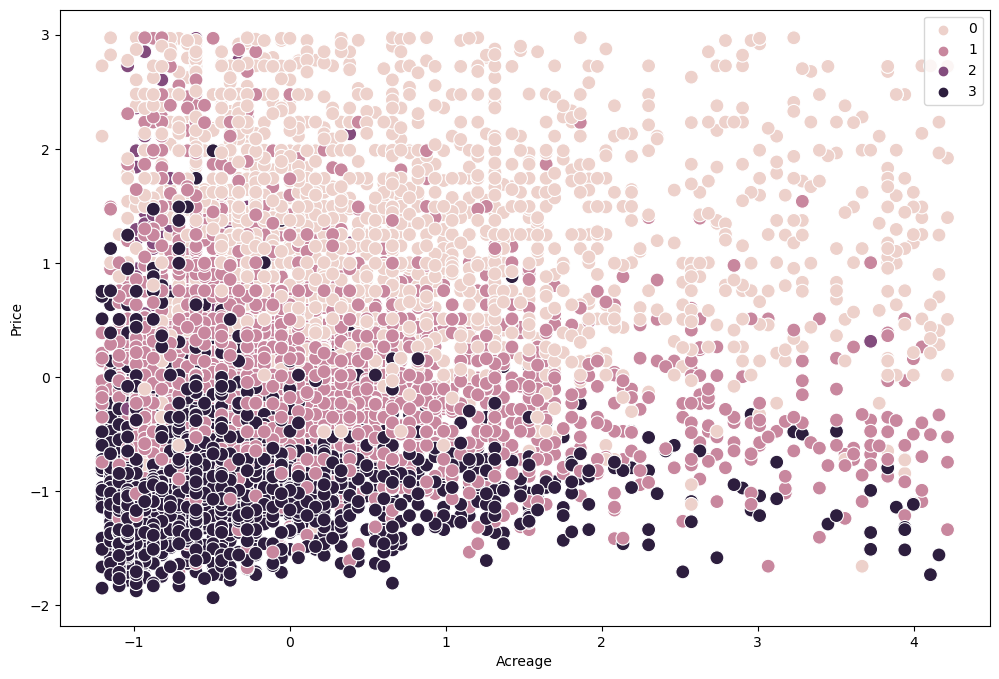

In [34]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=realtorNJ_sub['acre_lot'], y=realtorNJ_sub['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Acreage') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Observation:
It seems that acreage was a fourth dimension that was represented as the 4th cluster. When measuring house size vs price, cluster 4 did not show any correlation. However, in a scatter plot of acreage vs price, cluster 4 is more clearly seen concentrated in low price with ranging acreages. I would assume these properties had lower prices but with varying house sizes (maybe these represent rural houses?).I think in a further analysis, I could use a 3 dimensional graph would better model the relationships for all 4 clusters. Or use PCA to reduce number of components. 

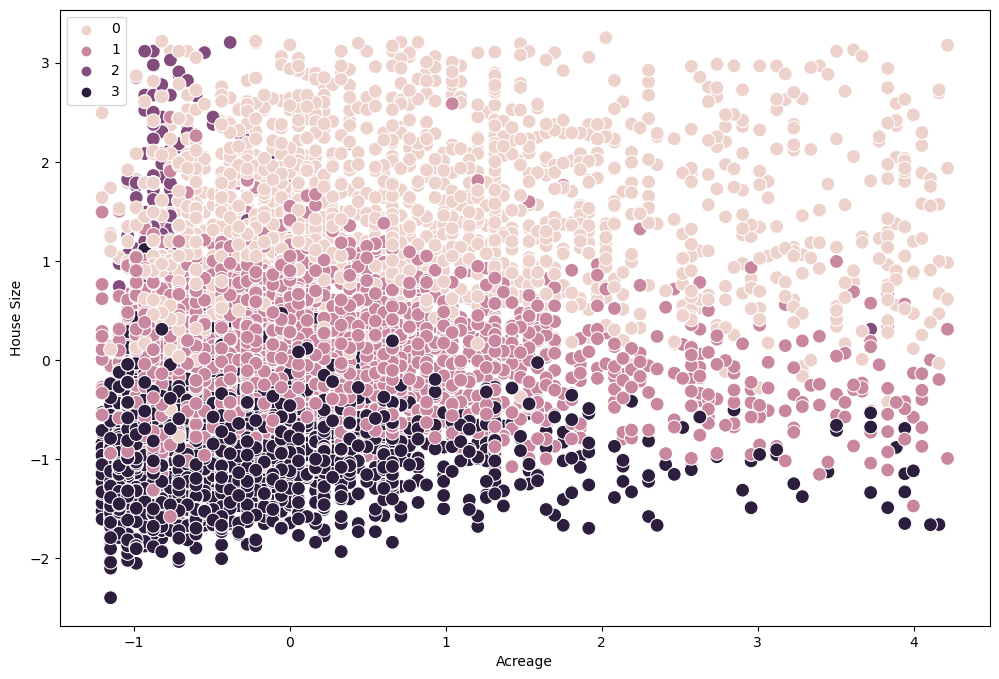

In [35]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=realtorNJ_sub['acre_lot'], y=realtorNJ_sub['house_size'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Acreage') # Label x-axis.
plt.ylabel('House Size') # Label y-axis.
plt.show()

In [36]:
realtorNJ_sub.loc[realtorNJ_sub['clusters'] == 3, 'cluster'] = 'Black'
realtorNJ_sub.loc[realtorNJ_sub['clusters'] == 2, 'cluster'] = 'dark purple'
realtorNJ_sub.loc[realtorNJ_sub['clusters'] == 1, 'cluster'] = 'purple'
realtorNJ_sub.loc[realtorNJ_sub['clusters'] == 0, 'cluster'] = 'pink'

realtorNJ_sub.groupby('cluster').agg({'bed':['mean', 'median'], 
                         'bath':['mean', 'median'], 
                         'acre_lot':['mean', 'median'],
                          'house_size':['mean', 'median'],
                            'price':['mean', 'median'],
                            'density':['mean', 'median'],})

C:\Users\polli\AppData\Local\Temp\ipykernel_37100\3537585841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realtorNJ_sub.loc[realtorNJ_sub['clusters'] == 3, 'cluster'] = 'Black'


bed                bath            acre_lot            \
                 mean    median      mean    median      mean    median   
cluster                                                                   
Black       -0.691990 -0.313881 -0.863200 -1.406891 -0.383256 -0.490242   
dark purple  1.620089  1.468816  0.767870  0.767870 -0.742387 -0.818717   
pink         0.830266  0.577467  1.139658  0.767870  0.715979  0.385693   
purple       0.057533 -0.313881  0.146223 -0.319510  0.068912 -0.161766   

            house_size               price             density            
                  mean    median      mean    median      mean    median  
cluster                                                                   
Black        -0.852599 -0.858336 -0.757643 -0.794675 -0.040663 -0.215531  
dark purple   0.592377  0.476596  0.371981  0.336694  3.731589  3.718404  
pink          1.409353  1.340722  1.294119  1.290386 -0.254024 -0.394181  
purple        0.018589 -0.004541  0.011156 -0.050204 -0.212142 -0.348483

### Observation:

For this analysis I measured only houses in the state of New Jersey to see if I can find clearer clusters of houses without influence from external variables between different states. I also standardized all variables to ensure that no single variable created a bias towards the k-means algorithm. Here I found some clustering between houses of small, medium, and large floor space with small to high price ranges. In the scatter plot above the algorithm was able to identify three clusters of low, medium, and high level houses based on price and living space. This was also somewhat clear when visualizing listing price vs number of bathrooms, where lower level houses had less bathrooms, while cluster 1 homes with the highest price range exist typically in having more than 2 bathrooms. 
### 
Based on the summary statistics, black clusters had the lowest averages for beds/baths, low prices, and low acreages, this could be apartment complexes or condominiums in urban areas. Purple had the best stats with the highest average bed/bathrooms, acre sizes, and house size. They also had the highest price in the lowest density areas, which could be most fitting for upper middle class houses in the suburbs. 
Additionally, Dark Purple seems to have the highest average population density and second highest price which makes sense considering in the last scatterplot, they were clustered around low levels of acreage size. This would make dark purple clusters to fit most like urban single family houses which are high because of their location rather than other factors. 
### 
For future analysis, I can use these clusters to generate categories for different levels of houses. For instance, I could create a category for upper middle class housing that uses cluster 1, the purple cluster. I could then identify similar characteristics such as the typical number of bathrooms, bedrooms, and acreages for upper middle class houses for that category class of homes. Furthermore, I can identify houses with those characteristics that have a much lower listing price as atypical or an outlier. This can maybe be used to identify undervalued or overvalued properties for a company or identify categories of house properties such as 'upper middle class suburbian house' or 'single person urban condominium/apartment'